In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
!conda install nltk
nltk.download()

/bin/bash: conda: command not found
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]      #This TAB seperated values file TSC file

In [ ]:
print(len(messages))

5574


In [ ]:
#Corpus is a collection of text

In [ ]:
for message_no, message in enumerate(messages[:10]):
  print(message_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])  #Convert to TSV to CSV
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#EDA part

In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

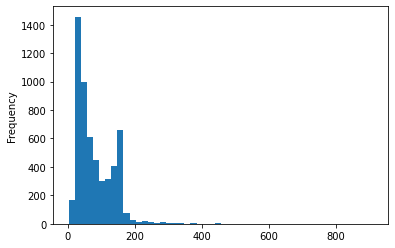

In [ ]:
messages['length'].plot(kind = 'hist', bins=50)

In [ ]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb28323ad50>,
      dtype=object)

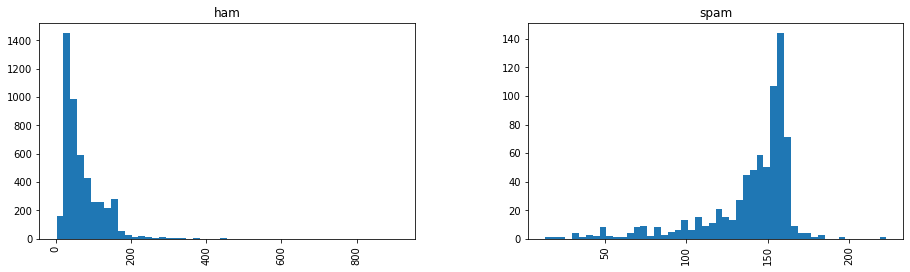

In [ ]:
messages.hist(column='length', by='label', bins=50, figsize=(15,4))

In [ ]:
#Text preprocessing since computer only understand numeric data for classification

In [ ]:
#Bag of words

In [ ]:
#Convert the seq of charater into Seq of numbers

In [ ]:
import string
mess = 'Sample message! Notice: It has punctuation.'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nopunc = [char for char in mess if char not in string.punctuation]

In [ ]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [ ]:
nopunc = ''.join(nopunc)

In [ ]:
nopunc

'Sample message Notice It has punctuation'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [ ]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [ ]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc =''.join(nopunc)
  
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  #not yet used, we have created to use it on message column, this is a custom analyser

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Tokeniation is used to describe the process of converting normal text into list of tokens

In [ ]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
# We may need to normalise the text, by doing:
# Stemming and distinguish by part of speech
# To recognise Language slangs

In [ ]:
#Look up NLTK book online to handle 

In [ ]:
#VEctorisation/Lemmas (List of vectors)

In [ ]:
'''#Implement Bag of words
1) Count how many times does a word occur in message (TF-Term Freq)
2) Weigh the counts so that freq tokens get lower weight(IDF-Inverse Document freq)
3) Normalise the vectors to unit ltnght to abstract drom original text(L2 norm)'''

'#Implement Bag of words\n1) Count how many times does a word occur in message (TF-Term Freq)\n2) Weigh the counts so that freq tokens get lower weight(IDF-Inverse Document freq)\n3) Normalise the vectors to unit ltnght to abstract drom original text(L2 norm)'

In [ ]:
#Calculate TF(Term frequency) Tokense / Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_trabsformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [ ]:
print(len(bow_trabsformer.vocabulary_))

11425


In [ ]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [ ]:
bow4 = bow_trabsformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [ ]:
print(bow_trabsformer.get_feature_names()[4068])

U


In [ ]:
print(bow_trabsformer.get_feature_names()[9554])

say


In [ ]:
messages_bow = bow_trabsformer.transform(messages['message'])

In [ ]:
print('Shape of Sparse Matrix:', messages_bow.shape)
print('Amount og Non Zero Occuerences:', messages_bow.nnz)

Shape of Sparse Matrix: (5572, 11425)
Amount og Non Zero Occuerences: 50548


In [ ]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))
#https://en.wikipedia.org/wiki/Sparse_matrix

sparsity: 0.07940295412668218


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer    #Calculate the TF code
tfid_transformer= TfidfTransformer().fit(messages_bow)
tfidf4 = tfid_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
tfid_transformer.idf_[bow_trabsformer.vocabulary_['u']]  #IDF is calucluated for 1 single word

3.2800524267409408

In [ ]:
tfid_transformer.idf_[bow_trabsformer.vocabulary_['say']]

5.231239632897098

In [ ]:
#Tfid_transformer is the whole bucket of words 
#Corpus
#The more the word appears the less weight it posesses in NLP
#

In [ ]:
messages_tfidf = tfid_transformer.transform(messages_bow)

In [ ]:
print(messages_tfidf.shape)

(5572, 11425)


In [ ]:
messages_tfidf
#Final Matrix should be of formatt (shape(total messages, Bag_of_words))

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [ ]:
#Training the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
####Wrong way

In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
print('prediction', spam_detect_model.predict(tfidf4)[0])
print('exppected',messages.label[3])

prediction ham
exppected ham


In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [ ]:
#Wrong way end

In [ ]:
#Using Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.2)

In [ ]:
print (len(msg_train), len(msg_test), len(label_train), len(label_test))

4457 1115 4457 1115


In [ ]:
from sklearn.pipeline import Pipeline

The entire process in 1 method

In [ ]:
pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer = text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])                    

In [ ]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb283071c20>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       981
        spam       1.00      0.75      0.85       134

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
confusion_matrix(label_test, predictions)

array([[981,   0],
       [ 34, 100]])

Costom input

In [ ]:
msg = 'Cheap!!! Buy through link for discount'
msg_series = pd.Series(msg)

In [ ]:
pipeline.predict(msg_series)

array(['ham'], dtype='<U4')

In [ ]:
#Not accurate model